In [2]:
Packages <- c("dplyr",  "nleqslv", "broom","cubature", "geosphere", "data.table",  "ggplot2", "bbmle", "stringr",  "lubridate", "RColorBrewer", "viridis")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))

setwd('/local/home/katrinac/oceanography')
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0

In [3]:
VelFields <- fread("~/oceanography/ROMS/data/camotes_sea_energy.csv")

In [4]:
head(VelFields)

Camotes_Sea_Site,Number_of_ROMS_Ocean_Grid_Cells,c_all_avg,c_NEM_avg,c_SWM_avg,c_2012_avg,c_2013_avg,c_2014_avg,EKE_all_avg,EKE_NEM_avg,EKE_SWM_avg,EKE_2012_avg,EKE_2013_avg,EKE_2014_avg,u_2012_avg,u_2013_avg,u_2014_avg,v_2012_avg,v_2013_avg,v_2014_avg
Palanas,1,4.77,6.71,2.52,5.62,6.01,6.07,36.87,42.57,23.94,87.40,84.52,77.78,-1.62,-0.61,-1.80,5.38,5.98,5.80
Wangag,1,5.28,6.77,3.02,6.71,6.64,6.52,32.96,38.28,21.22,77.11,73.94,75.91,-1.60,-0.76,-1.93,6.51,6.59,6.23
Magbangon,1,5.00,6.05,3.60,7.41,6.97,6.24,29.04,31.60,23.83,79.23,83.07,77.94,0.19,-0.18,-1.98,7.41,6.97,5.92
Cabatoan,1,4.65,5.75,3.13,7.37,6.98,5.84,28.02,30.70,22.95,88.27,90.87,83.80,0.63,0.04,-1.74,7.34,6.98,5.57
Caridad_Cemetery,1,3.46,5.37,1.26,4.36,3.84,2.24,29.65,32.79,21.77,92.77,92.70,92.79,1.28,-0.38,-0.79,4.17,3.82,2.09
Caridad_Proper,1,2.16,4.63,4.69,3.84,3.08,0.88,43.34,39.33,49.06,105.38,112.56,109.06,2.83,1.39,0.77,2.60,2.75,0.43


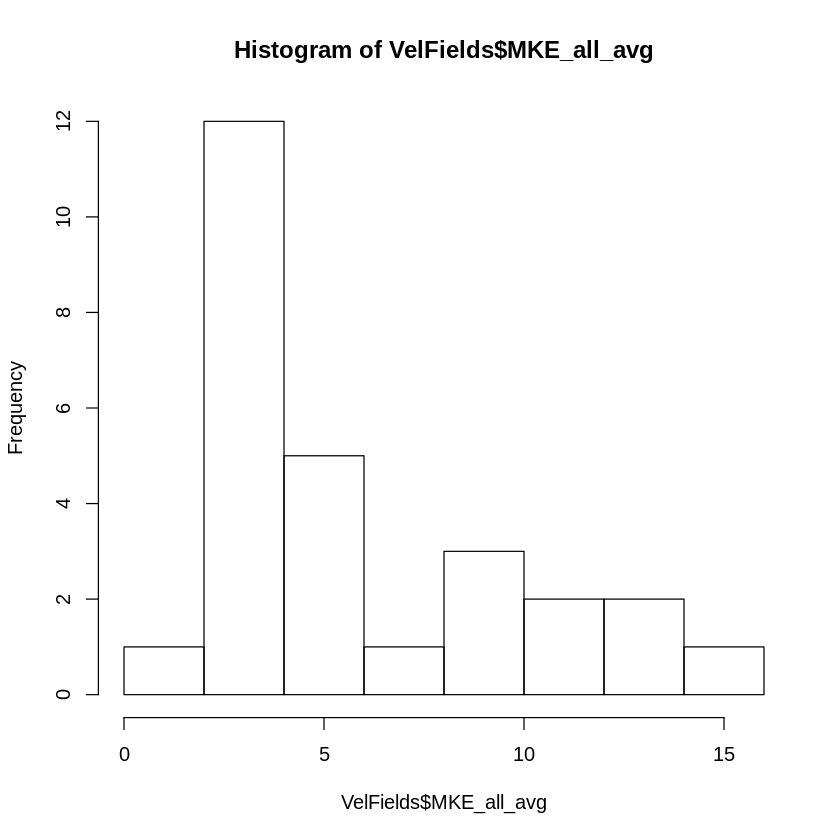

In [22]:
hist(VelFields$MKE_all_avg) #looking at the response variables of interest there's a right skew, use gamma dist

In [36]:
summary(VelFields[Number_of_ROMS_Ocean_Grid_Cells==1])

 Camotes_Sea_Site   Number_of_ROMS_Ocean_Grid_Cells   u_all_avg        
 Length:18          Min.   :1                       Min.   :-62.25860  
 Class :character   1st Qu.:1                       1st Qu.:-61.43444  
 Mode  :character   Median :1                       Median :  0.09344  
                    Mean   :1                       Mean   :-22.96816  
                    3rd Qu.:1                       3rd Qu.:  1.89581  
                    Max.   :1                       Max.   :  3.17186  
   u_all_std       v_all_avg        v_all_std       u_NEM_avg      
 Min.   :1.315   Min.   :-4.423   Min.   :1.168   Min.   :-62.911  
 1st Qu.:1.690   1st Qu.:-3.369   1st Qu.:1.443   1st Qu.:-61.969  
 Median :1.974   Median :-2.437   Median :3.439   Median : -0.445  
 Mean   :2.295   Mean   :28.651   Mean   :2.988   Mean   :-23.681  
 3rd Qu.:2.986   3rd Qu.:78.527   3rd Qu.:4.136   3rd Qu.:  1.033  
 Max.   :3.531   Max.   :79.504   Max.   :5.476   Max.   :  2.192  
   u_NEM_std       v

In [39]:
mke_NEM <- glm(MKE_NEM_avg ~  u_NEM_avg * v_NEM_avg, data = VelFields[Number_of_ROMS_Ocean_Grid_Cells==1], family = Gamma("inverse"))
summary(mke_NEM)



Call:
glm(formula = MKE_NEM_avg ~ u_NEM_avg * v_NEM_avg, family = Gamma("inverse"), 
    data = VelFields[Number_of_ROMS_Ocean_Grid_Cells == 1])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5287  -0.3359  -0.1263   0.2085   0.8581  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)          0.0268443  0.0557780   0.481  0.63776   
u_NEM_avg           -0.1065525  0.0268308  -3.971  0.00139 **
v_NEM_avg           -0.0663883  0.0249478  -2.661  0.01862 * 
u_NEM_avg:v_NEM_avg  0.0002553  0.0002556   0.999  0.33493   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.2299788)

    Null deviance: 10.9792  on 17  degrees of freedom
Residual deviance:  2.7352  on 14  degrees of freedom
AIC: 95.997

Number of Fisher Scoring iterations: 5


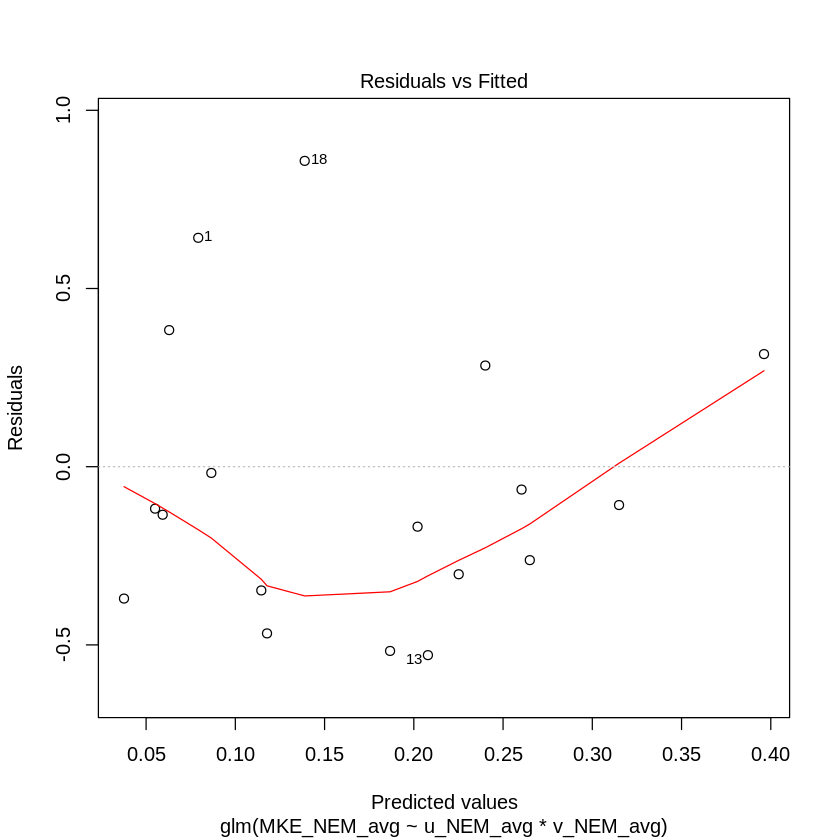

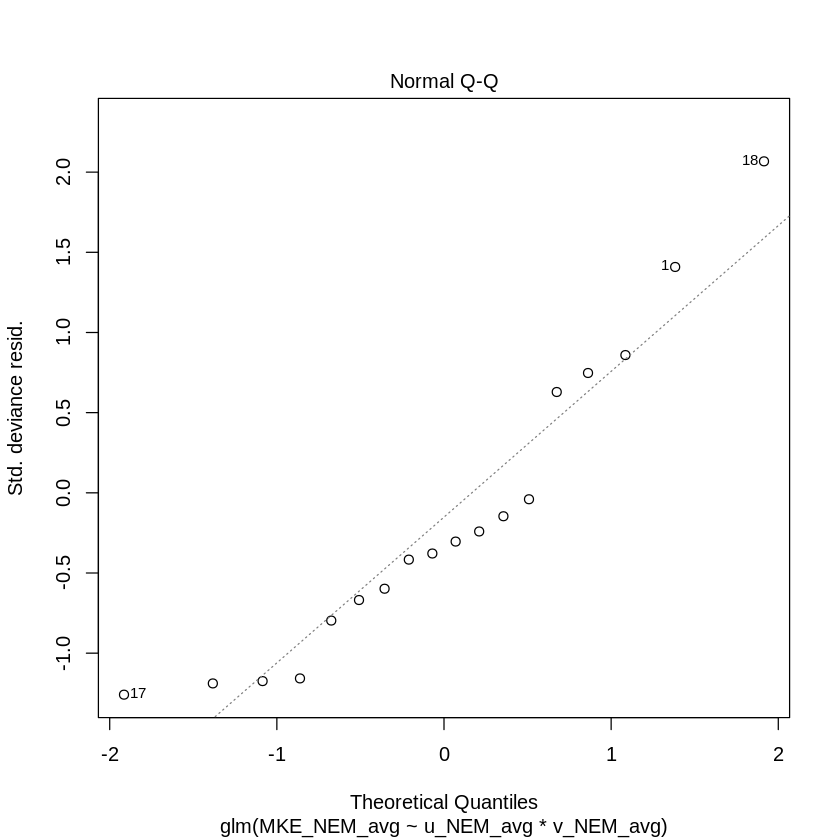

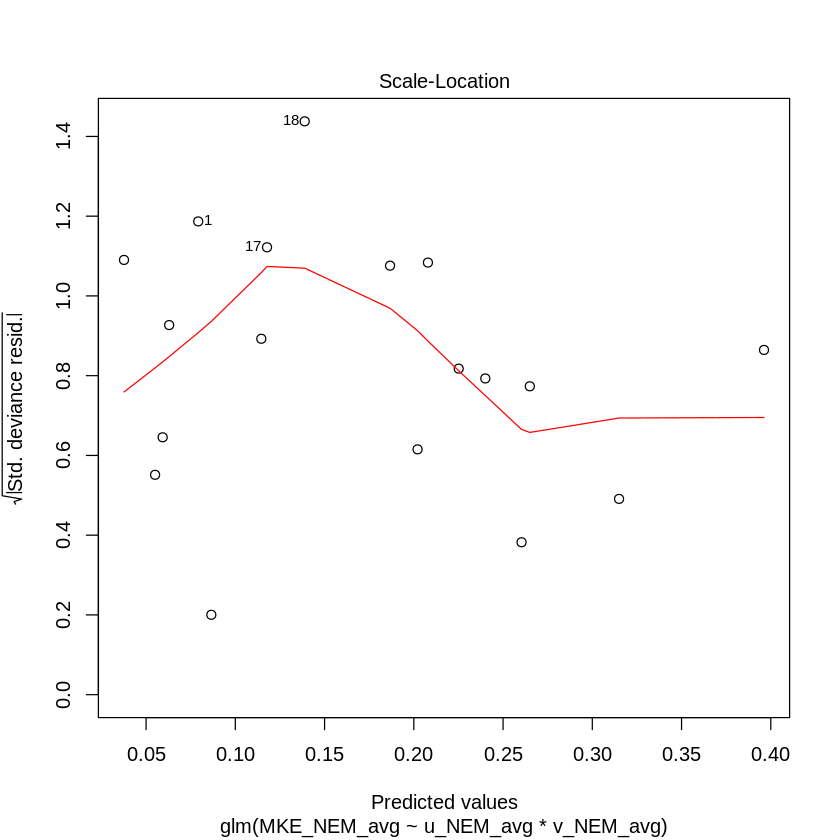

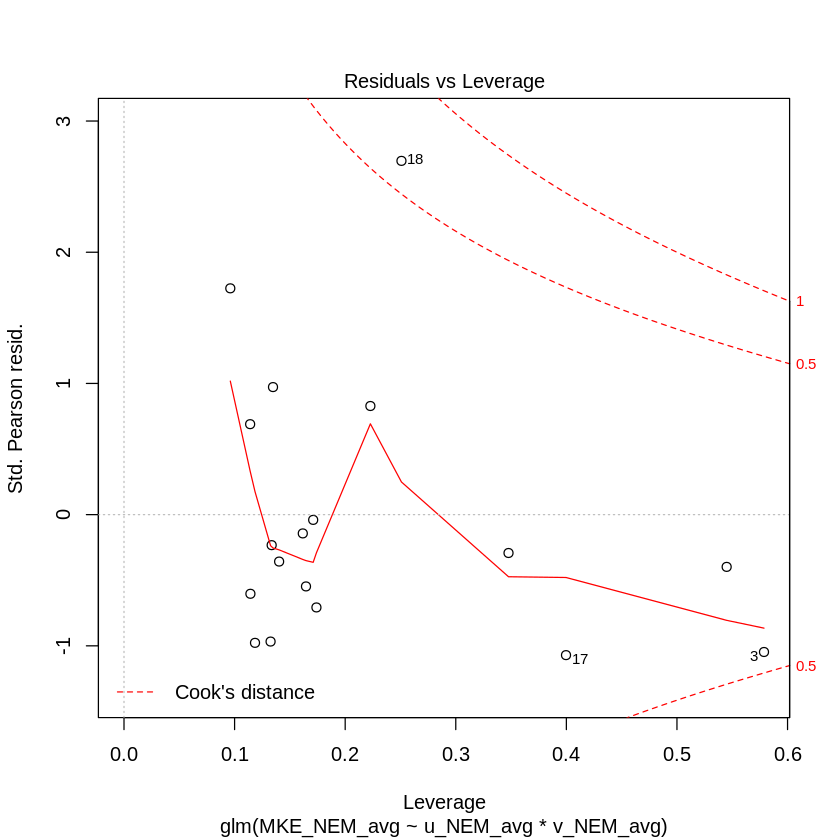

In [32]:
plot(mke)

In [5]:
SitesNS <- read.csv("~/parentage/text_file/sites_NS.txt", stringsAsFactors = F) %>%
    mutate(site=ifelse(site =="S. Magbangon" , "Magbangon", site)) %>%
    filter(site != "N. Magbangon") 
SitesNS

site,index
Palanas,1
Wangag,2
Magbangon,4
Cabatoan,5
Caridad Cemetery,6
Caridad Proper,7
Hicgop South,8
Sitio Tugas,9
Elementary School,10
Sitio Lonas,11


In [8]:
VelFieldsLong$site <- factor(VelFieldsLong$site, levels = rev(c("Palanas", "Wangag", "Magbangon", "Cabatoan", "Caridad Cemetery", "Caridad Proper", "Hicgop", "Hicgop South", "Sitio Tugas", "Elementary School", "Sitio Lonas", "San Agustin", "Poroc San Flower", "Poroc Rose",  "Visca", "Tomakin Dako", "Haina", "Sitio Baybayon", "Camotes Islands")))

In [7]:
#make the ROMS data tidy
VelFieldsLong <- melt(VelFields[, site := gsub("_", " ", Camotes_Sea_Site)][ #make a site column and drop the lengthier name
    ,-"Camotes_Sea_Site"], , id.vars = c("site", "Number_of_ROMS_Ocean_Grid_Cells"))[#change to long format
    variable %like% "all", time_id := "2012-2014"][ #make a time frame column
    variable %like% "NEM", time_id := "Amihan"][
    variable %like% "SWM", time_id := "Habagat"][
    variable %like% "2012", time_id := "2012"][
    variable %like% "2013", time_id := "2013"][
    variable %like% "2014", time_id := "2014"][
    , time_scale := ifelse(time_id %in% c("2012", "2013", "2014"), "annual", "monsoonal")][
    variable %like% "avg", stat := "avg"][
    variable %like% "u_", feature := "u"][
    variable %like% "v_", feature := "v"][
    variable %like% "EKE", feature := "EKE"][
    variable %like% "c_", feature := "c"][
    site=="Tamakin Dacot", site := "Tomakin Dako"][
    site=="CAI", site := "Camotes Islands"][
    site %in%  c("Palanas", "Wangag", "Magbangon", "Cabatoan", "Caridad Cemetery", "Caridad Proper", "Hicgop", "Hicgop South", "Sitio Tugas", "Elementary School", "Sitio Lonas", "San Agustin", "Poroc San Flower", "Poroc Rose",  "Visca", "Tomakin Dako", "Haina", "Sitio Baybayon", "Camotes Islands")]

#order sites N-S
VelFieldsLong$site <- factor(VelFieldsLong$site, levels = rev(c("Palanas", "Wangag", "Magbangon", "Cabatoan", "Caridad Cemetery", "Caridad Proper", "Hicgop", "Hicgop South", "Sitio Tugas", "Elementary School", "Sitio Lonas", "San Agustin", "Poroc San Flower", "Poroc Rose",  "Visca", "Tomakin Dako", "Haina", "Sitio Baybayon", "Camotes Islands")))

In [9]:
VelFieldsLong

site,Number_of_ROMS_Ocean_Grid_Cells,variable,value,time_id,time_scale,stat,feature
Palanas,1,c_all_avg,4.77,2012-2014,monsoonal,avg,c
Wangag,1,c_all_avg,5.28,2012-2014,monsoonal,avg,c
Magbangon,1,c_all_avg,5.00,2012-2014,monsoonal,avg,c
Cabatoan,1,c_all_avg,4.65,2012-2014,monsoonal,avg,c
Caridad Cemetery,1,c_all_avg,3.46,2012-2014,monsoonal,avg,c
Caridad Proper,1,c_all_avg,2.16,2012-2014,monsoonal,avg,c
Hicgop,1,c_all_avg,4.06,2012-2014,monsoonal,avg,c
Hicgop South,1,c_all_avg,3.77,2012-2014,monsoonal,avg,c
Sitio Tugas,1,c_all_avg,2.84,2012-2014,monsoonal,avg,c
Elementary School,1,c_all_avg,2.12,2012-2014,monsoonal,avg,c


In [10]:
Summary <- VelFieldsLong[site != "Camotes Islands", .(mean_value=mean(value), std_value=sd(value)), by=c("time_id", "variable")]
#fwrite(Summary, file="~/oceanography/script_output/ROMSDataTables/VelFieldsSummaryOverSites.csv")

In [12]:
Summary[order(variable, mean_value)]

time_id,variable,mean_value,std_value
2012-2014,c_all_avg,3.171111,1.130215
Amihan,c_NEM_avg,4.360000,1.741939
Habagat,c_SWM_avg,5.207222,3.377031
2012,c_2012_avg,4.653333,1.852750
2013,c_2013_avg,4.888333,1.769587
2014,c_2014_avg,4.253333,2.177440
2012-2014,EKE_all_avg,72.037778,37.419172
Amihan,EKE_NEM_avg,73.915556,36.973554
Habagat,EKE_SWM_avg,68.465000,49.198655
2012,EKE_2012_avg,130.980556,47.128748


In [22]:
kernels <- fread("~/oceanography/script_output/KernelFits/summary_tables/KernelFittingSummary.csv")

In [24]:
head(kernels[data_source=="simulation_08PLD", .(time_id, mdd)])

time_id,mdd
2012,3.778224
2013,4.080705
2014,3.504783
2012-4,3.770613
Amihan,3.617719
Habagat,6.354512


In [30]:
mean_c_mdd <- left_join(kernels[data_source=="simulation_08PLD", .(time_id, mdd)], Summary[variable %like% "c", .(time_id, mean_c=mean_value)])[time_id!="2012-4"]

Joining, by = "time_id"

In [75]:
cor.test(mean_c_mdd$mdd, mean_c_mdd$mean_c, method = "pearson")


	Pearson's product-moment correlation

data:  mean_c_mdd$mdd and mean_c_mdd$mean_c
t = 3.0559, df = 3, p-value = 0.05517
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05287606  0.99133928
sample estimates:
      cor 
0.8699754 


In [76]:
cor.test(mean_c_mdd[time_id %in% c("2012", "2013", "2014"), mdd], mean_c_mdd[time_id %in% c("2012", "2013", "2014"), mean_c], method = "pearson")


	Pearson's product-moment correlation

data:  mean_c_mdd[time_id %in% c("2012", "2013", "2014"), mdd] and mean_c_mdd[time_id %in% c("2012", "2013", "2014"), mean_c]
t = 5.5581, df = 1, p-value = 0.1133
alternative hypothesis: true correlation is not equal to 0
sample estimates:
      cor 
0.9841974 


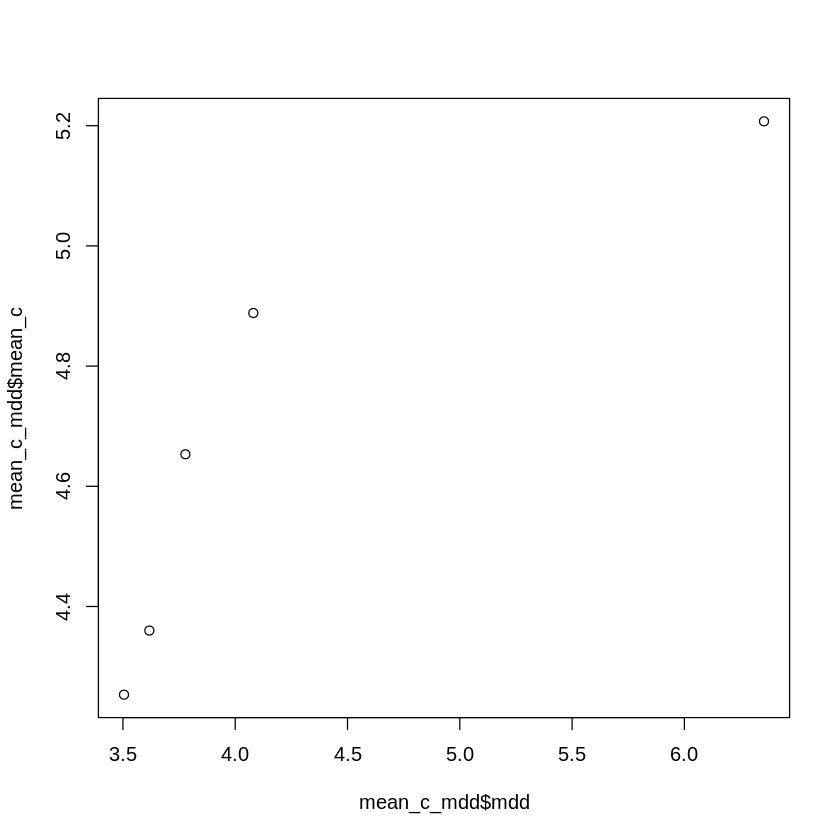

In [35]:
plot(mean_c_mdd$mdd, mean_c_mdd$mean_c)

`geom_smooth()` using formula 'y ~ x'


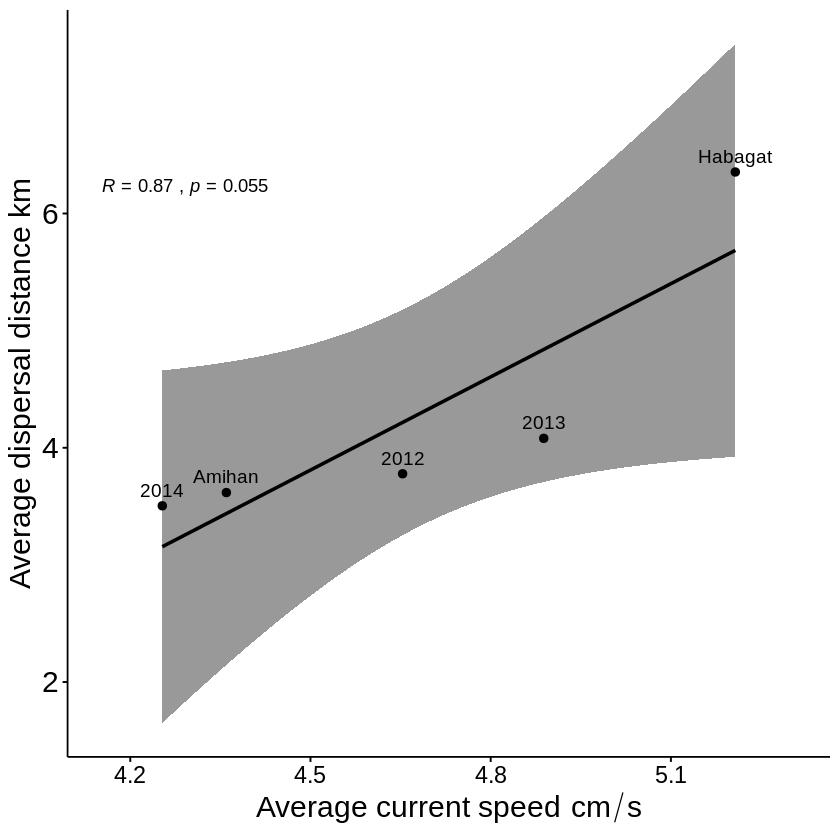

In [79]:
library("ggpubr")
current_cor <- ggscatter(mean_c_mdd, x = "mean_c", y = "mdd", 
          add = "reg.line", conf.int = T, 
          cor.coef = TRUE, cor.method = "pearson", label="time_id")+
xlab("Average current speed" ~cm/s)+
ylab("Average dispersal distance km")+
theme(axis.line = element_line(colour = "black"),axis.text.x =  element_text(size=14, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=18, color="black"),
    axis.title.x =  element_text(size=18, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=18, color="black"))+
scale_x_continuous(limits = c(min(mean_c_mdd$mean_c)-0.1, max(mean_c_mdd$mean_c)+0.1))
current_cor

In [80]:
ggsave(plot=current_cor, filename="Current_MDD_Cor.pdf", path= "~/oceanography/script_output/plots/", units="cm", width=15, height=15)

`geom_smooth()` using formula 'y ~ x'


In [71]:
MKE_avg <- ggplot()+
    geom_point(data=VelFieldsLong[feature=="MKE" &stat=="avg"], aes(x=value, y=site, color=time_id, shape=time_id)) +
    xlab("MKE_avg")
ggsave(filename="Camotes_MKE_Avg.pdf",  plot=MKE_avg, path="~/oceanography/script_output/plots/", units="cm", width=15, height=15)


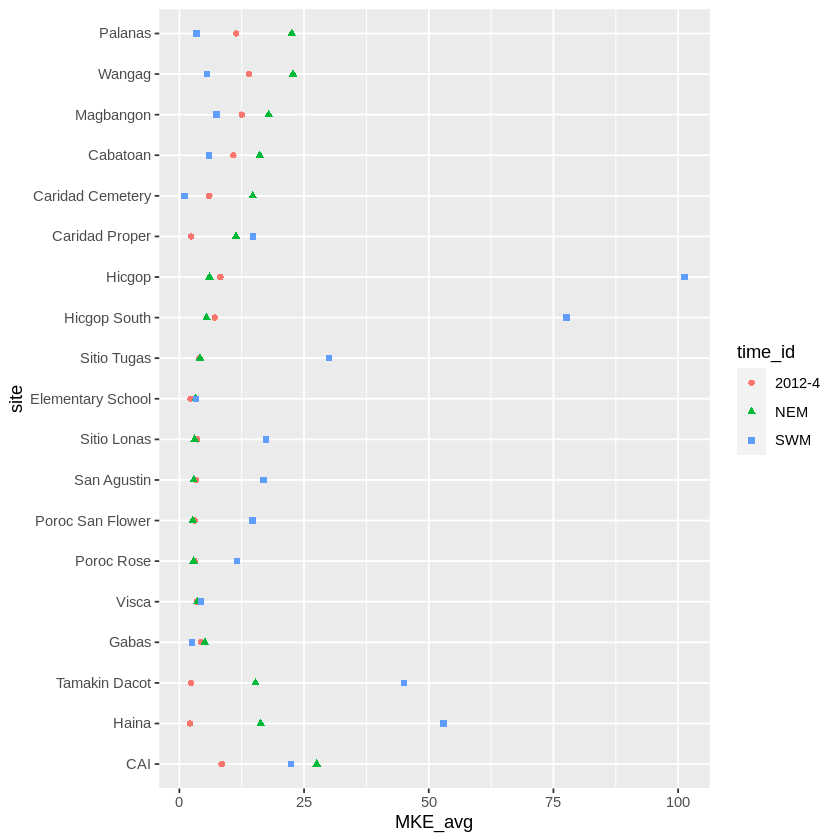

In [72]:
MKE_avg

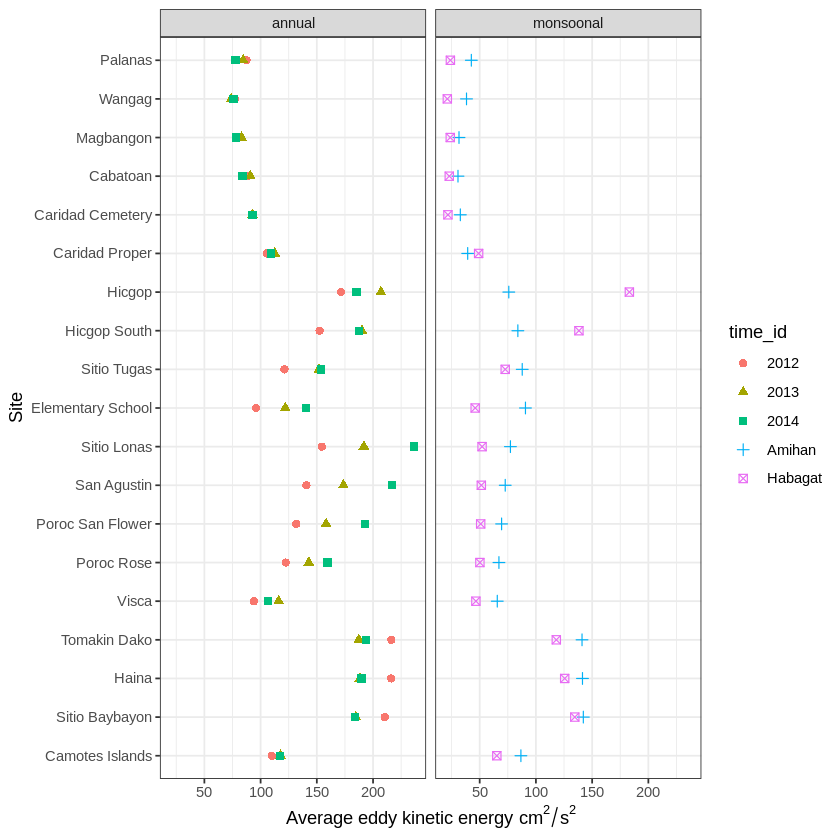

In [24]:
EKE_avg <- ggplot()+
    geom_point(data=VelFieldsLong[feature=="EKE" &stat=="avg" & time_id != "2012-2014"], aes(x=value, y=site, color=time_id, shape=time_id), size=2)+
    #xlab("EKE_avg (cm^2 s^-2)")
    labs(y="Site", x = expression ("Average eddy kinetic energy"~cm^2/s^2))+
    theme_bw()+
facet_wrap(~ time_scale, ncol=2)
    #scale_colour_manual(values=c("black", "#0072B2", "#D55E00"), name="Time scale", breaks=c("2012-4","NEM", "SWM"),
                      #labels=c("2012-4", "Amihan", "Habagat")) +
    #scale_shape_manual(values = c(16, 15, 17), name="Time scale", breaks=c("2012-4","NEM", "SWM"),
                      #labels=c("2012-4", "Amihan", "Habagat"))
EKE_avg
ggsave(filename="Camotes_EKE_Avg.pdf",  plot=EKE_avg, path="~/oceanography/script_output/plots/", units="cm", width=15, height=15)


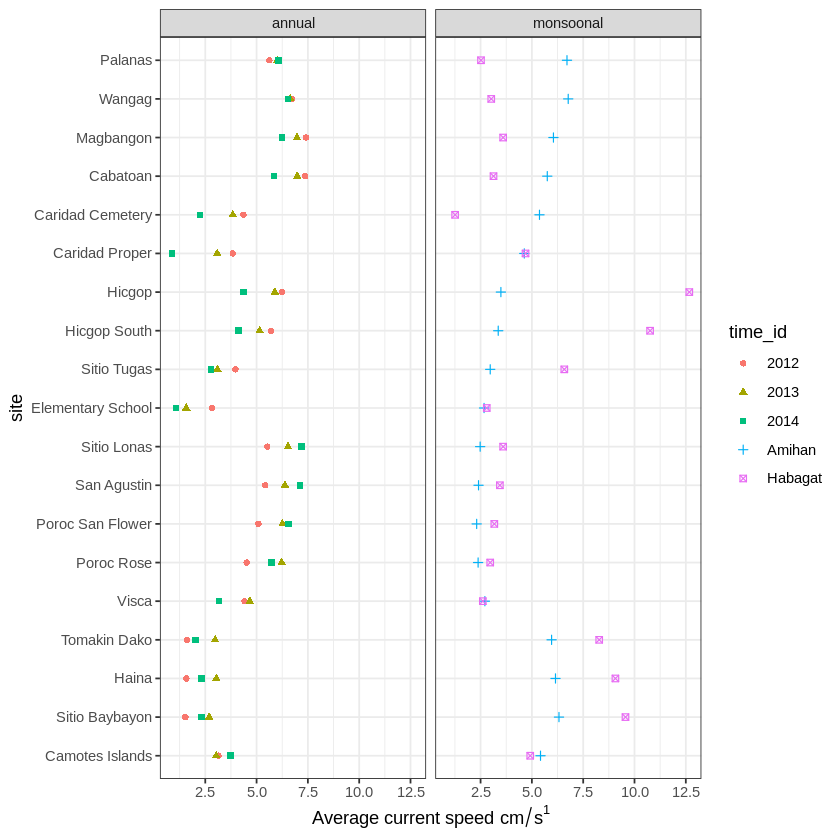

In [26]:
c_avg <- ggplot()+
    geom_point(data=VelFieldsLong[feature=="c" &stat=="avg"& time_id != "2012-2014"], aes(x=value, y=site, color=time_id, shape=time_id))+
    xlab("Average current speed"~cm/s^1)+   
theme_bw()+
facet_wrap(~ time_scale, ncol=2)
c_avg
ggsave(filename="Camotes_c_Avg.pdf",  plot=c_avg, path="~/oceanography/script_output/plots/", units="cm", width=15, height=15)


In [13]:
SimConn <- fread(file="~/oceanography/script_output/ROMSDataTables/SimConnectivityTableWithMeta08DayPLD.csv")[source !="Other"][dest !="Other"]

In [14]:
#SimConn is currently formatted so each row is a day. Aggregate interannually and by monsoons to match ROMS feature data
SimConnAggYears<- SimConn[, .(particles_rec_aggregate_years=sum(daily_particles_rec), particles_released_aggregate_years=sum(daily_particles_released)), by=c("source", "dest")][
    , normalized_conn_years := particles_rec_aggregate_years/particles_released_aggregate_years, by=c("source", "dest")]

SimConnAggMonsoons <- SimConn[, .(particles_rec_aggregate_monsoons=sum(daily_particles_rec), particles_released_aggregate_monsoons=sum(daily_particles_released)), by=c("source", "dest")][
    , normalized_conn_monsoons := particles_rec_aggregate_monsoons/particles_released_aggregate_monsoons, by=c("source", "dest")]

SimConnAgg <- left_join(SimConnAggMonsoons, SimConnAggYears)
SimConnAgg

Joining, by = c("source", "dest")

source,dest,particles_rec_aggregate_monsoons,particles_released_aggregate_monsoons,normalized_conn_monsoons,particles_rec_aggregate_years,particles_released_aggregate_years,normalized_conn_years
CAI,Palanas,32,229717440,1.393016e-07,32,229717440,1.393016e-07
CAI,Wangag,10,229717440,4.353174e-08,10,229717440,4.353174e-08
CAI,Magbangon,43,229717440,1.871865e-07,43,229717440,1.871865e-07
CAI,Cabatoan,26,229717440,1.131825e-07,26,229717440,1.131825e-07
CAI,Caridad Cemetery,0,229717440,0.000000e+00,0,229717440,0.000000e+00
CAI,Caridad Proper,2,229717440,8.706348e-09,2,229717440,8.706348e-09
CAI,Hicgop South,1,459434880,2.176587e-09,1,459434880,2.176587e-09
CAI,Sitio Tugas,0,229717440,0.000000e+00,0,229717440,0.000000e+00
CAI,Elementary School,0,229717440,0.000000e+00,0,229717440,0.000000e+00
CAI,Sitio Lonas,0,229717440,0.000000e+00,0,229717440,0.000000e+00


In [15]:
TestVel <- left_join(SimConnAggMonsoons, dcast(VelFieldsLong[feature %in% c("c", "EKE")], site+time_id+stat~ feature, value.var="value"), by=c(source="site"))[source ==dest]

In [21]:
head(VelFieldsLong)

site,Number_of_ROMS_Ocean_Grid_Cells,variable,value,time_id,time_scale,stat,feature
Palanas,1,c_all_avg,4.77,2012-2014,monsoonal,avg,c
Wangag,1,c_all_avg,5.28,2012-2014,monsoonal,avg,c
Magbangon,1,c_all_avg,5.00,2012-2014,monsoonal,avg,c
Cabatoan,1,c_all_avg,4.65,2012-2014,monsoonal,avg,c
Caridad Cemetery,1,c_all_avg,3.46,2012-2014,monsoonal,avg,c
Caridad Proper,1,c_all_avg,2.16,2012-2014,monsoonal,avg,c


In [19]:
kernels <- fread("~/oceanography/script_output/KernelFits/summary_tables/KernelFittingSummary.csv")

In [20]:
kernels

data_source,time_scale,time_id,lower_k,k,upper_k,lower_theta,theta,upper_theta,lower_mdd,mdd,upper_mdd,lower_med,med,upper_med,dist90
simulation_08PLD,annual,2012,-0.388,-0.388,-0.386,0.637,0.637,0.637,3.77,3.778224,3.78,2.09,2.096410,2.10,9.305059
simulation_08PLD,annual,2013,-0.645,-0.642,-0.642,0.679,0.679,0.680,4.07,4.080705,4.10,2.35,2.351905,2.36,9.967812
simulation_08PLD,annual,2014,0.074,0.076,0.076,0.564,0.564,0.565,3.49,3.504783,3.51,1.79,1.797263,1.80,8.749074
simulation_08PLD,interannual,2012-4,-0.314,-0.312,-0.312,0.621,0.621,0.622,3.76,3.770613,3.79,2.06,2.060501,2.07,9.314044
simulation_08PLD,season,Amihan,-0.433,-0.432,-0.430,0.657,0.657,0.657,3.61,3.617719,3.62,2.04,2.044842,2.05,8.875493
simulation_08PLD,season,Habagat,0.234,0.239,0.247,0.467,0.467,0.467,6.33,6.354512,6.41,2.81,2.826102,2.85,16.085780
genetics,annual,2012,-3.494,-3.271,-3.200,1.940,3.529,4.337,11.93,13.020000,18.81,11.24,12.020000,15.80,25.080000
genetics,annual,2013,-3.289,-3.275,-3.191,4.372,5.000,5.000,11.75,12.770000,13.03,11.20,12.180000,12.29,23.910000
genetics,annual,2014,1.861,1.972,2.506,0.215,0.260,0.268,32.82,76.000000,836.81,7.88,17.470000,140.81,182.370000
genetics,interannual,2012-4,-0.469,-0.226,-0.116,0.434,0.439,0.453,10.50,13.690000,18.50,4.55,5.770000,7.72,34.740000


In [ ]:
# I don't think my model structure is optimal. maybe trim down routes to be SR or within sampled area, and then make u and v each columns to test for interaction.

In [195]:
TestSourceFeatures <- left_join(SimConnAgg, VelFieldsLong, by=c(source="site"))[source != "Other"] #joining by the feature data for the SOURCE site
TestDestFeatures <- left_join(SimConnAgg, VelFieldsLong, by=c(dest="site"))[source != "Other"] #joining by the feature data for the DESTINATION site

In [220]:
head(TestVel)

source,dest,particles_rec_aggregate_monsoons,particles_released_aggregate_monsoons,normalized_conn_monsoons,time_id,stat,u,v
CAI,CAI,159712127,229717440,0.6952547,2012-4,avg,2.811295,28.31765
CAI,CAI,159712127,229717440,0.6952547,2012-4,std,15.904073,55.62847
CAI,CAI,159712127,229717440,0.6952547,NEM,avg,0.830784,29.55999
CAI,CAI,159712127,229717440,0.6952547,NEM,std,16.263951,54.93353
CAI,CAI,159712127,229717440,0.6952547,SWM,avg,6.756183,26.14856
CAI,CAI,159712127,229717440,0.6952547,SWM,std,14.851921,56.92452


In [18]:
summary(glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ c , family = binomial(link = logit)))

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


Call:
glm(formula = normalized_conn_monsoons ~ c, family = binomial(link = logit), 
    data = TestVel[time_id != "2012-4" & stat == "avg"])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.08280  -0.06445  -0.04192  -0.01881   0.24042  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -5.287573   3.492831  -1.514    0.130
c           -0.009703   0.734122  -0.013    0.989

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.69012  on 95  degrees of freedom
Residual deviance: 0.68994  on 94  degrees of freedom
AIC: 4.9282

Number of Fisher Scoring iterations: 8


In [232]:
#source_vel_years <- glm(data=TestVel[time_id =="2012-4" & stat=="avg"][feature== "u" | feature=="v"], normalized_conn_years ~ value , family = binomial(link = logit))

source_avg_v_monsoons <- glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ v , family = binomial(link = logit))
source_avg_u_monsoons <- glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ u, family = binomial(link = logit))
source_avg_u_v_monsoons<- glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ u+v , family = binomial(link = logit))
source_avg_u_v_monsoons_time_id <- glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ u+v+time_id, family = binomial(link = logit))

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

In [235]:
AIC(source_avg_v_monsoons, source_avg_u_monsoons, source_avg_u_v_monsoons, source_avg_u_v_monsoons_time_id)
summary(source_avg_u_v_monsoons_time_id)



,df,AIC
source_avg_v_monsoons,2,21.43583
source_avg_u_monsoons,2,20.82213
source_avg_u_v_monsoons,3,20.72340
source_avg_u_v_monsoons_time_id,4,22.70807



Call:
glm(formula = normalized_conn_monsoons ~ u + v + time_id, family = binomial(link = logit), 
    data = TestVel[time_id != "2012-4" & stat == "avg"])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7387  -0.3014  -0.2596  -0.1313   1.4133  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.87866    1.00513  -2.864  0.00418 **
u            0.03467    0.03599   0.963  0.33546   
v            0.02319    0.02103   1.102  0.27025   
time_idSWM  -0.08954    1.22666  -0.073  0.94181   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12.218  on 51  degrees of freedom
Residual deviance: 11.218  on 48  degrees of freedom
AIC: 22.708

Number of Fisher Scoring iterations: 6


In [228]:
summary(source_avg_u_v_monsoons)


Call:
glm(formula = normalized_conn_monsoons ~ u + v, family = binomial(link = logit), 
    data = TestVel[time_id != "2012-4" & stat == "avg"])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7515  -0.3032  -0.2635  -0.1358   1.4335  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.92434    0.79605  -3.674 0.000239 ***
u            0.03448    0.03590   0.961 0.336784    
v            0.02310    0.02103   1.099 0.271913    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12.218  on 51  degrees of freedom
Residual deviance: 11.224  on 49  degrees of freedom
AIC: 20.723

Number of Fisher Scoring iterations: 6


In [152]:
summary(source_avg_MKE_mod_monsoons)
summary(source_avg_MKE_mod_years)


Call:
glm(formula = normalized_conn_years ~ value, family = binomial(link = logit), 
    data = TestSourceFeatures[time_id != "2012-4" & stat == "avg" & 
        feature == "MKE"])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.09725  -0.09336  -0.08229  -0.04595   2.51344  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.349135   0.538913  -9.926   <2e-16 ***
value       -0.002615   0.024978  -0.105    0.917    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33.121  on 1351  degrees of freedom
Residual deviance: 33.110  on 1350  degrees of freedom
AIC: 37.997

Number of Fisher Scoring iterations: 8



Call:
glm(formula = normalized_conn_years ~ value, family = binomial(link = logit), 
    data = TestSourceFeatures[time_id == "2012-4" & stat == "avg" & 
        feature == "MKE"])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.09768  -0.09293  -0.08302  -0.04586   2.51341  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.32077    1.03008  -5.165  2.4e-07 ***
value       -0.01182    0.15430  -0.077    0.939    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16.561  on 675  degrees of freedom
Residual deviance: 16.555  on 674  degrees of freedom
AIC: 21.012

Number of Fisher Scoring iterations: 8


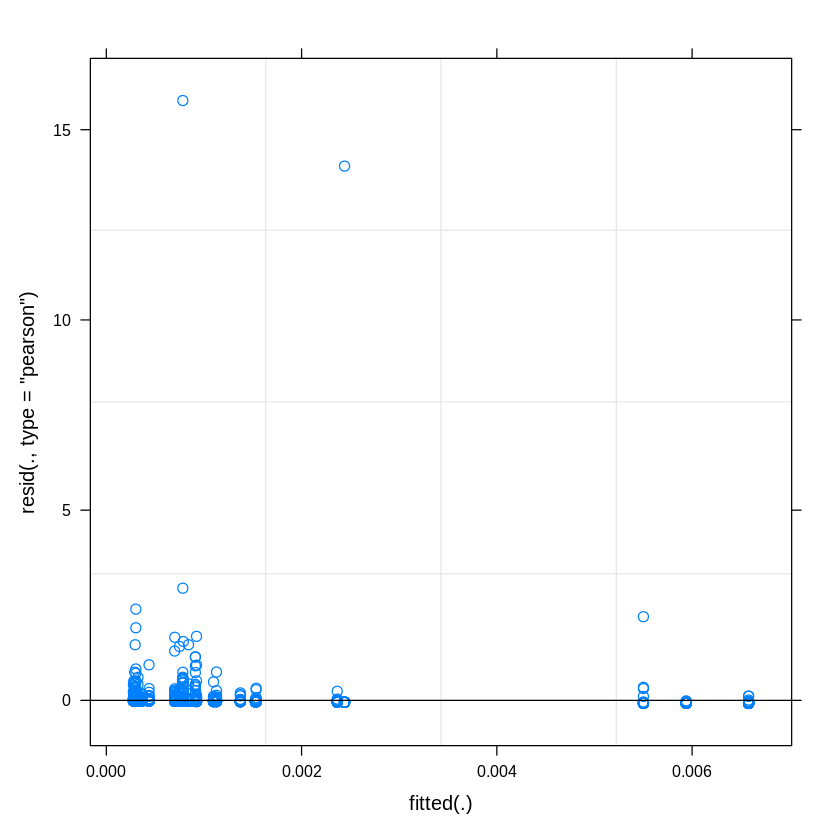

In [124]:
plot(source_avg_EKE_mod)

In [115]:
summary(TestSourceFeatures$normalized_conn_years)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000333 0.0003074 0.0045530 0.0018622 0.6952547 

In [104]:
tail(TestSourceFeatures)

source,dest,particles_rec_aggregate_monsoons,particles_released_aggregate_monsoons,normalized_conn_monsoons,particles_rec_aggregate_years,particles_released_aggregate_years,normalized_conn_years,Number_of_ROMS_Ocean_Grid_Cells,variable,value,time_id,stat,feature
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_all_avg,36.87234,2012-4,avg,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_all_std,0.00000,2012-4,std,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_NEM_avg,43.43542,NEM,avg,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_NEM_std,0.00000,NEM,std,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_SWM_avg,42.56767,SWM,avg,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_SWM_std,0.00000,SWM,std,EKE
